# Timescale Ex 5
The system is given by
$$x' = y-\sin(x), \quad y'=-\varepsilon x.$$
If you run the animated solution and then want to rerun the whole thing with new initial conditions or a new epsilon, it will 'animate' the first part as well.  If you find this annoying, then go to the Kernal tab, and click 'Restart & Clear Output'.  Otherwise it should still work.  

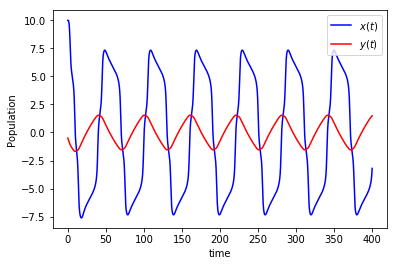

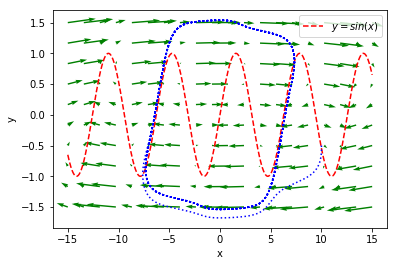

In [2]:
EndTime=400

eps=.02

xinitial=10
yinitial=-.5

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def f(X,t):
    x,y = X
    return np.array([y-np.sin(x),-eps*x])
t=np.linspace(0,EndTime,EndTime*100)
z=odeint(f,[xinitial,yinitial],t)
plt.plot(t,z[:,0],'b-',label='$x(t)$')
plt.plot(t,z[:,1],'r-',label='$y(t)$')
plt.ylabel('Population')
plt.xlabel('time')
plt.legend(loc='best')
plt.ioff()
plt.show() 

# 2D phase plane S vs. E1
x, y = np.meshgrid(np.linspace(-15, 15,20),
                      np.linspace(-1.5,1.5,10))
u = f([x,y],t)[0]
v = f([x,y],t)[1]
plt.quiver(x,y,u,v,color='g')
xx=np.linspace(-15,15,1000)
plt.plot(xx,np.sin(xx),'r--',label='$y=sin(x)$')
plt.plot(z[:,0],z[:,1],'b:')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


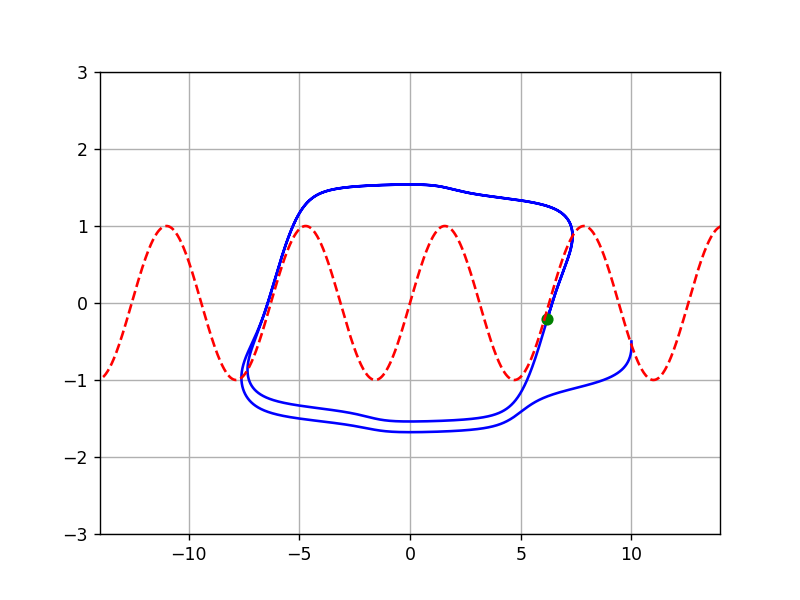

In [3]:
%matplotlib notebook

fig, ax = plt.subplots()
line, = ax.plot([z[0,0]], [z[0,1]], 'b-')
point, = ax.plot([z[0,0], z[0,1]], 'go')
line.set_data(xinitial, yinitial)
point.set_data(z[0,0],z[0,1])
ax.grid()

def animate(i):
    point.set_data(z[i,0],z[i,1])
    line.set_data(z[0:i,0],z[0:i,1])
    return line, 

ax.set_xlim(-14,14)
ax.set_ylim(-3,3)
#xx=np.linspace(.001,1.5,1000)
plt.plot(xx,np.sin(xx),'r--')
#plt.plot(-xx,-(xx)**(1./3.),'r--')
ani = animation.FuncAnimation(fig, animate, np.arange(1, len(z)), interval=1)
plt.show()